Name

Labpartner(s)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

# Class 13.2 Machine Learning Continued

#### Announcements

- For the next two weeks we will have virtual workdays from 2-4PM, and you will submit your programming and a weekly project planning and assessment form.
- Reminder **no labs will be accepted after 4/18.** After this you all will be working on your final projects. Please review the syllabus on BB for grading policies. 


# Warmup 13.2

**W.1** Using what you learned in the timeseries lab and practice python exeriese, write a program that asks for a user's birthday and then tells them how old they are.

In [11]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [15]:
year=input('What year were you born?')
month=input('What month were you born?')
day=input('What day were you born?')
date=datetime(int(year),int(month),int(day))
age=date.today()-date
yr_age=age.days/365
print('You are '+str(np.floor(yr_age))+' years old')

What year were you born? 1988
What month were you born? 6
What day were you born? 28


You are 32.0 years old


**W.2** Amend your program to tell them how old they will turn on their birthday in 2050.

In [18]:
year=input('What year were you born?')
month=input('What month were you born?')
day=input('What day were you born?')
date=datetime(int(year),int(month),int(day))
age=datetime(2050,1,1)-date
yr_age=age.days/365
print('You will be '+str(np.floor(yr_age))+' years old at the start of 2050')

What year were you born? 1988
What month were you born? 6
What day were you born? 28


You will be 61.0 years old at the start of 2050


# Lecture 13.2

## Agenda:
- Machine Learning in Scikit learn continued

## Review

Last time we went through the data sets and the first square in the scikitlearn classifcation example. Let's continue.

## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


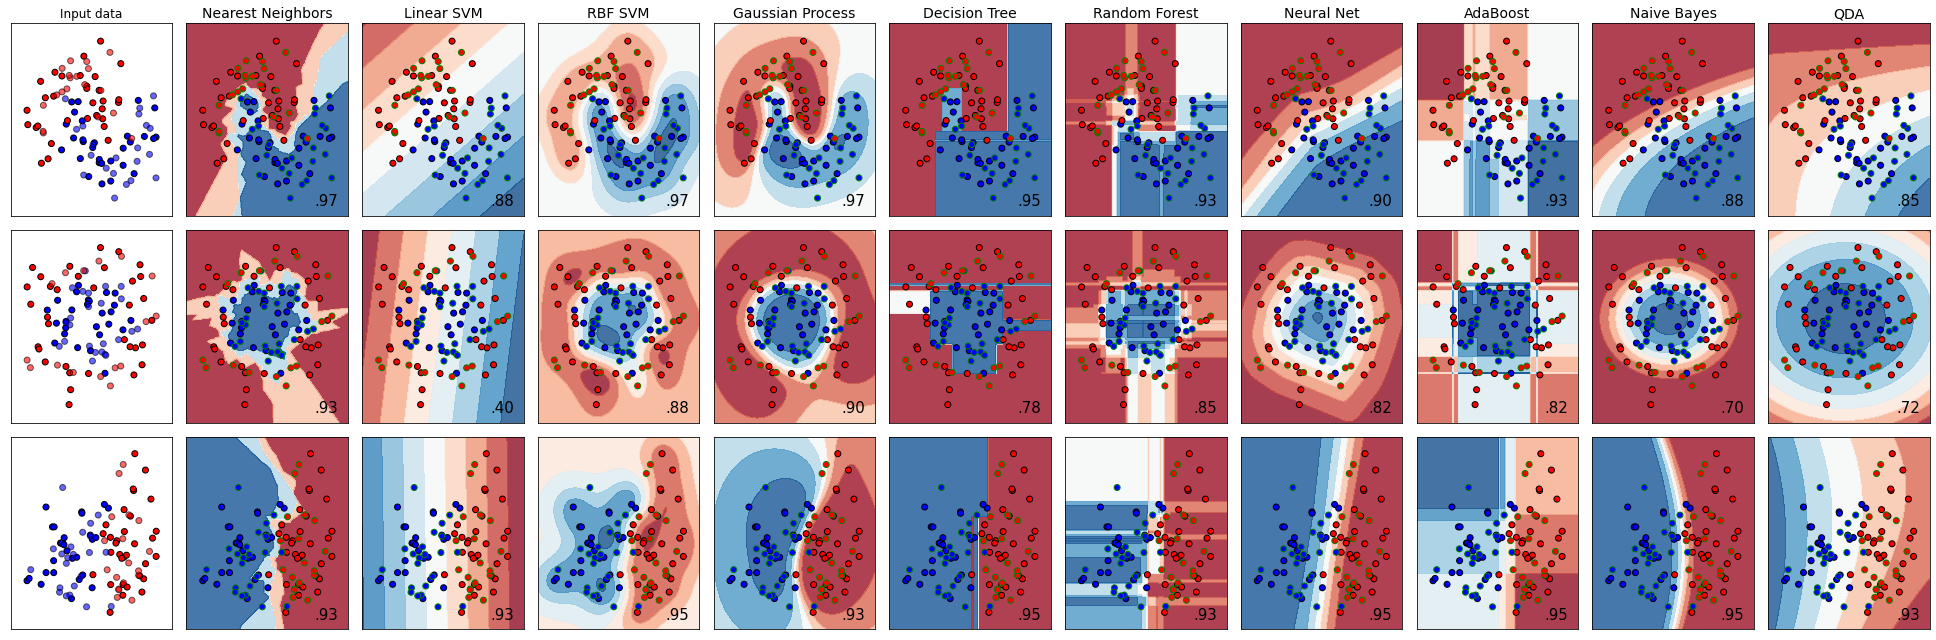

In [32]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adamf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


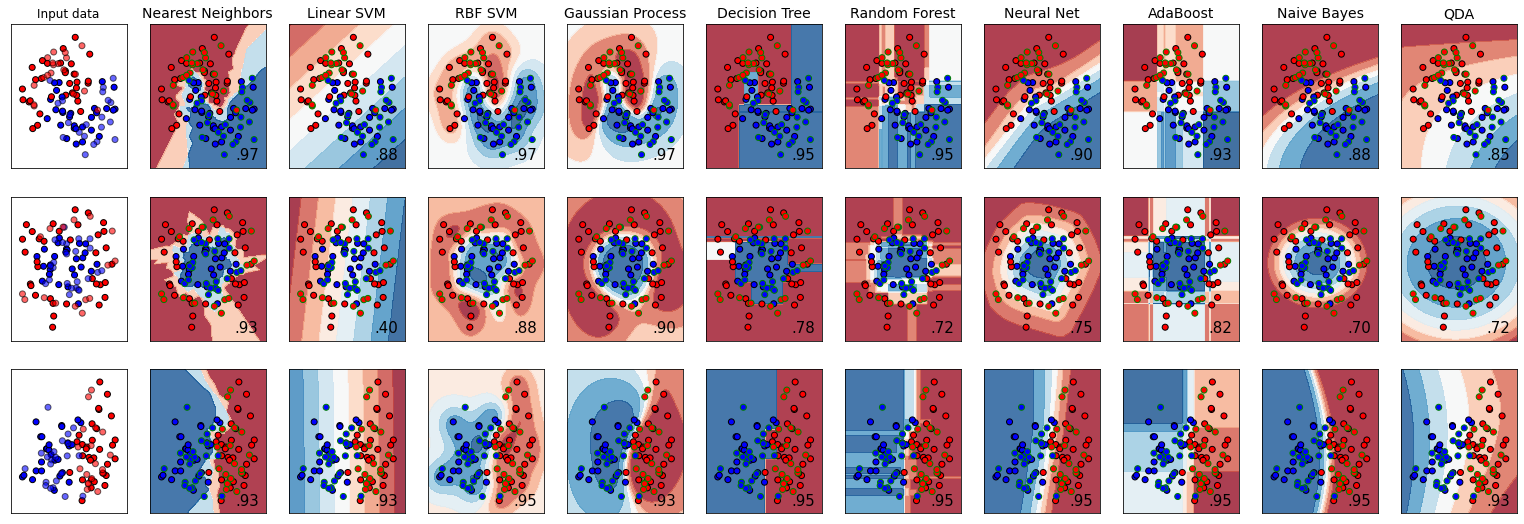

In [33]:
figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

## Plotting the results of the prediction

In [35]:
# make the linearly separable data (the first row)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


### **Q** What are X and y?
Explain in relation to the plot above.

In [22]:
X

array([[-0.17749658,  0.93049627],
       [ 1.97742406,  1.76615529],
       [ 1.80002379,  1.7003428 ],
       [-0.77083686,  2.35916348],
       [-0.30800901,  1.59406316],
       [ 0.61472141,  2.43489824],
       [ 1.0909431 ,  2.21663402],
       [-0.83488954,  2.35868875],
       [ 2.47946499,  1.33418967],
       [ 1.19926597,  1.82681392],
       [ 2.18506184,  0.8226875 ],
       [ 1.68423203,  1.0411311 ],
       [ 1.14621135,  2.07048527],
       [ 1.35596945,  0.56802498],
       [ 1.38520748,  1.82607238],
       [ 1.86729217,  1.18692699],
       [ 0.31227376,  2.24605353],
       [-0.08183484,  1.70065511],
       [ 0.90484472,  2.60683016],
       [-0.4358609 ,  2.0151414 ],
       [ 0.81441196,  2.13546784],
       [ 3.10874312,  2.26786504],
       [-0.25574217,  1.71281146],
       [ 1.88663027,  2.72089513],
       [ 2.29503547,  3.89267759],
       [-0.11415626,  0.85593357],
       [ 1.69703537,  3.47717799],
       [ 1.83855775,  0.92667213],
       [ 1.60298807,

The classification creates a prediction in the 2D space of the data of what the expected value is, blue or red. To plot this we need to define a grid of data we can apply classification result to. This is done using meshgrid. Meshgrid creates a grid of x,y data, similar to np.arange, but in 2D

In [36]:
# reminder about numpy arange: syntax is start, stop, stride
np.arange(1,20,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

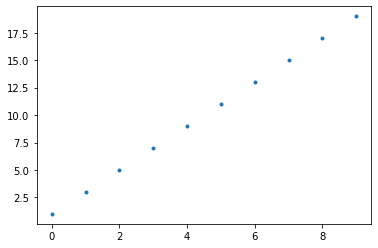

In [37]:
plt.plot(np.arange(1,20,2),'.')  # plotting dots for each data point
#  what is the x-axis here?

Meshgrid takes two arrays and makes a grid of values:

In [38]:
np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))

[array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]]),
 array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
        [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
        [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
        [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
        [19, 19, 19, 19, 19, 19, 19, 19, 19, 19]

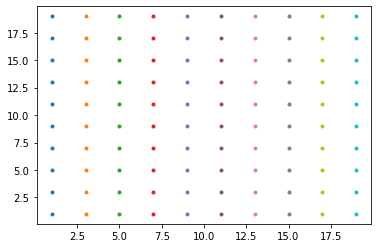

In [39]:
x1, y1 = np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))
plt.plot(x1,y1, '.');

We can use the meshgrid output to define a 2D function for plotting. 

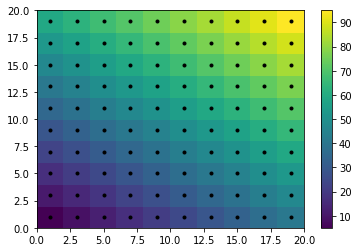

In [40]:
x1, y1 = np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))
plt.plot(x1,y1, 'k.')
plt.pcolormesh(x1,y1, 2*x1 +3*y1, shading = 'auto') # what is this the equation of?
plt.colorbar()


### Q: Define a meshgrid over -1 to 1 with ~100 points and plot the function $z = x^2 + y^2$

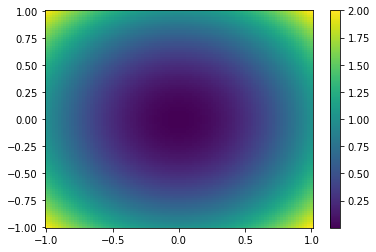

In [125]:
x2, y2 = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))

plt.pcolormesh(x2,y2, x2**2 +y2**2, shading = 'auto') # what is this the equation of?
plt.colorbar()

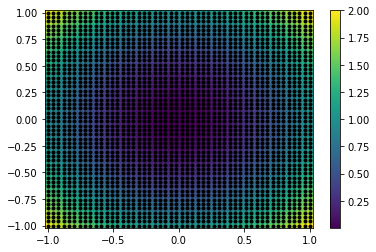

In [127]:

x1, y1 = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
plt.plot(x1,y1, 'k.') 
# linspace  like arange but you tell it the point to use 

plt.pcolormesh(x1,y1, x1**2 + y1**2, shading = 'auto') # what is this the equation of?
plt.colorbar()

Back to the code:

In [27]:
# set the min and max of x and y based on the dataset
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# use the above to define the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

The different methods either have a probablity that the x,y in question is red or blue, or a decision boundary

In [46]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

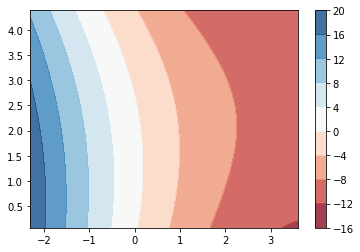

In [29]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

Now we will add in the training and testing points, and see how well the method did to predict the latter

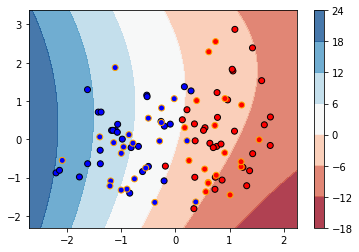

In [34]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# Lab 13.2

**E.1** What does plt.tight_layout() in the sample code do?

It maximizes the size of the plots without having any overlap or loss in clarity of the data in the plots due to the resizing.

**E.2** You will be assigned a column in the above using one of the other methods. Go through the same exercise as above for each of the three different datasets. Research how your method works. On Monday, you and your partner will explain to the class the basics of what your method does, and how well it works for the dataset, and what other applications it can be used for.

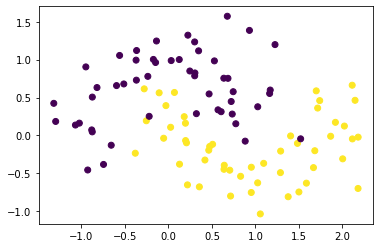

In [96]:
X,y = make_moons(noise=0.3, random_state=0)
plt.scatter(X[:,0],X[:,1], c= y)

In [97]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

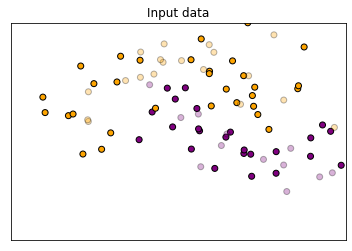

In [105]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i = 1
ds_cnt = 0
cm = plt.cm.PuOr
cm_bright = ListedColormap(['orange', 'purple'])
ax = plt.subplot(1,1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

In [106]:
name = names[8]
clf = classifiers[8]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [107]:
score

0.875

In [108]:
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

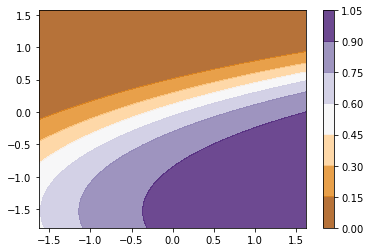

In [109]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

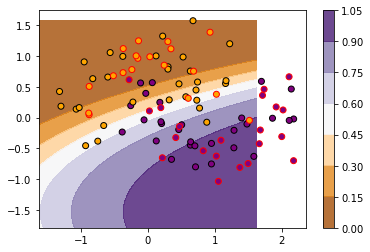

In [110]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='red', alpha=1, zorder = 10)

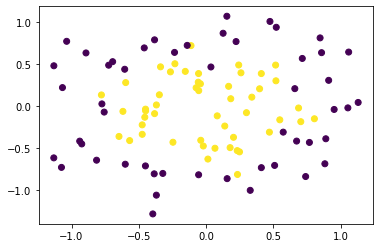

In [111]:
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)
plt.scatter(X[:,0],X[:,1], c= y)

In [112]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

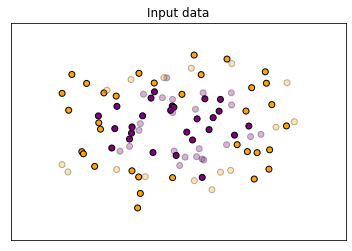

In [113]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i = 1
ds_cnt = 0
cm = plt.cm.PuOr
cm_bright = ListedColormap(['orange', 'purple'])
ax = plt.subplot(1,1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

In [114]:
name = names[8]
clf = classifiers[8]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [115]:
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

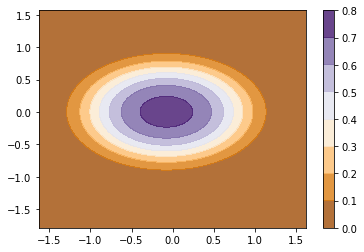

In [116]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

In [117]:
score

0.7

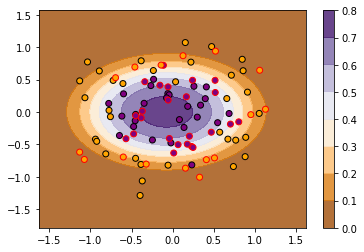

In [118]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='red', alpha=1, zorder = 10)

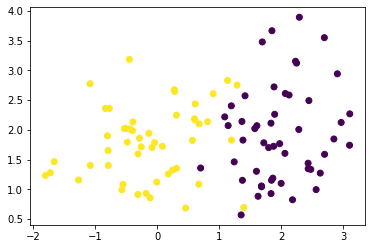

In [119]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
plt.scatter(X[:,0],X[:,1], c= y)

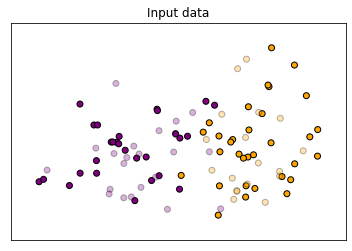

In [120]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i = 1
ds_cnt = 0
cm = plt.cm.PuOr
cm_bright = ListedColormap(['orange', 'purple'])
ax = plt.subplot(1,1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

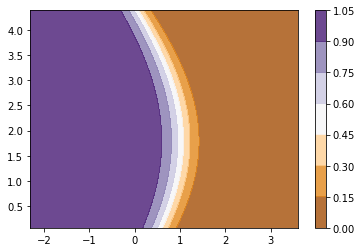

In [121]:
name = names[8]
clf = classifiers[8]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

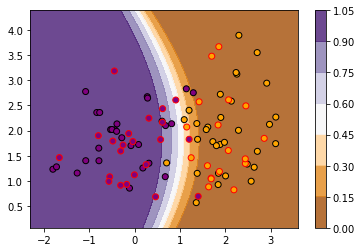

In [122]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='red', alpha=1, zorder = 10)

In [123]:
score

0.95

Naive bayes uses the probability of a value in each variable class from the training data to generate predictions about which group that value is likely to indicate. For example if x[0]=weight, x[1]=height, and the groups were athletes and non-athletes then training points could be used to create a likelihood for each weight and height value to be in either group. A height value where 95% of the training points are non-athletes and 80% of the weight training points are non-athletes would yield an area of the plot where the individual point is very likely to be predicted as a non-athlete. This, prediction usually works if the data is linearly separable, but if the data has one group nested within the other group at any sections of the data the naive bayes method does not function as well, which is shown by the moons and circle data sets. This is because the variables are looked at independently of each other by the classifier, where as in other classifiers both variables can be used to classify together. For example if athletes in the data set were found in a narrow height to weight ratio region, some other classifiers would use both variables to highlight the region, but the naive bayes would only look at height and weight separately so it could easily be thrown off by the fact that non athletes can have a height and weight that individually overlap with athletes, but in the real world would not likely be measurements for a real athlete. For example some athletes can wiegh around 250 pounds and some are 5 foot 6 inches, but it is unlikely that the same athlete would be both. Naive bayes cannot make this differentiation because the variables are independent. 

**E.3** Watch the SEEMS seminar on machine learning from earlier this term by Scott James: https://www.utrgv.edu/seems/news/seminars/index.htm

**E.3a** What differend methods of machine learning were mentioned and used in this presentation?

Supervised and unsupervised were two broad categories. The specific types of machine learning neural networks mentioned were multilayer perceptron neural networks, convolutional neural networks, and long short-term memory networks.

**E.3b** What applications were these methods applied to? What was the result?

1.) A multi-layer perceptron model was compared to the resource intense physics model SWAN for modelling waves. The neural network was almost as accurate, and ran much faster.
2.) Convolutional neural network used to classify landscape categories on images. Was able to classify features more accurately than traditional non machine learning analysis of pixels.
3.) A long short-term memory network was used to analyze transient weather data, in conjunction with a multi-layer perceptron model analyzing static landscape properties to determine soil moisture. The result was a slight underestimate, but overall very accurate and nearly instantaneous.    

**E.4** Research how machine learning has been used in your field of reserch and report on what you found. 

The most relevant way that machine learning would directly impact my research is through the automated classification of camera trap data. Models can be trained to recognize animals to species and reduce how labor intensive the analysis of large camera trap array data is. Additionally, there are plenty of applications for ecological modelling and habitat classification of aerial images which are currently being explored.
Tabak, Michael A., et al. "Machine learning to classify animal species in camera trap images: Applications in ecology." Methods in Ecology and Evolution 10.4 (2019): 585-590.

**E.5** How else could machine learning be used for your field of research?

The identification of species with unique patterns to the individual level is possible and should be a topic with more research in the near future. Currently there are algorithms used in software like Wild ID and Hotspotter which do this, but a machine learning model would potentially function better and faster and be able to account for some of the features in an image (ex. shadows) which can create a false positive or negative in the current software packages.